# EOF

In [1]:
import netCDF4

import numpy as np

from sklearn.decomposition import PCA

f = netCDF4.Dataset('W:\\SST\\ERSST\\sst.mnmean.nc')
SST = f.variables['sst'][:, :, :].data[-1202:-2]
f.close()

A = SST > -10  # 1表示海洋，0表示陆地
A = np.average(A, axis = 0)
np.sum(A)

new_SST = np.zeros((len(SST), int(np.sum(A))))
s = 0

# 将同一时刻二维的海温转变为一维
for i in range(89):
    for j in range(180):
        if A[i, j] == 1:
            new_SST[:, s] += SST[:, i, j]
            s += 1

In [2]:
month_mean = np.zeros((12, int(np.sum(A))))
month_s = np.arange(0, 1200, 12)
month_s
for i in range(12):
    month_mean[i] = np.copy(np.average(new_SST[month_s + i, :], axis = 0))
for i in range(12):
    new_SST[month_s + i, :] -= month_mean[i]  # 每月减掉月平均

In [3]:
x = np.arange(1200)

y = np.array([np.average(row) for row in new_SST])

from sklearn import linear_model

reg = linear_model.LinearRegression()

for i in range(int(np.sum(A))):
    y = new_SST[:, i]
    reg.fit(np.array([x]).T, y)
    y = x * reg.coef_ + reg.intercept_
    new_SST[:, i] -= y  # 去趋势

b = np.mean(new_SST, axis = 0)
new_SST -= b

In [4]:
pca = PCA(n_components=4)

pca.fit(new_SST)

EOFs = pca.components_  # EOF本质是PCA的转换矩阵

In [5]:
new_EOFs = np.zeros((4, 89, 180))
for i in range(4):
    s = 0
    for j in range(89):
        for k in range(180):
            if A[j, k] == 1:
                new_EOFs[i, j, k] = EOFs[i, s]
                s += 1

d:\python36\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


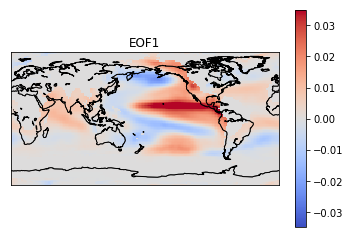

In [9]:
from mpl_toolkits.basemap import Basemap

import matplotlib.pyplot as plt

m = Basemap(llcrnrlon = 0, llcrnrlat = -90, urcrnrlon = 360, urcrnrlat = 90, ellps = 'WGS84')
m.drawcoastlines()

x_max, y_max = m(359, 89)
x, y = np.mgrid[-y_max:y_max:90j, -x_max/359:x_max:181j]

show_EOFs = np.zeros((89, 180))

for i in range(89):
    show_EOFs[i] = new_EOFs[0, 8 - i]

plt.subplot(111)
plt.xlim(0, x_max)
plt.ylim(-y_max, y_max)
mesh = plt.pcolor(y, x, show_EOFs, cmap=plt.get_cmap('coolwarm'))
mesh.set_clim(vmin=-0.035, vmax=0.035)
plt.title('EOF1')
plt.colorbar()
m.drawcoastlines(linewidth=0.5)
plt.show()

# SVD

In [10]:
U, s, Vh = np.linalg.svd(new_SST.T)  # 注意sklearn中pca函数和numpy中svd函数的区别

In [11]:
new_EOFs = np.zeros((4, 89, 180))
for i in range(4):
    s = 0
    for j in range(89):
        for k in range(180):
            if A[j, k] == 1:
                new_EOFs[i, j, k] = U[s, i]
                s += 1

d:\python36\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


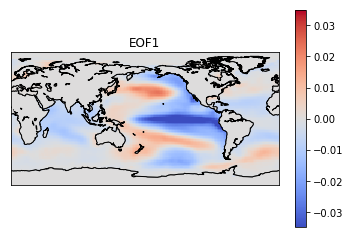

In [12]:
from mpl_toolkits.basemap import Basemap

import matplotlib.pyplot as plt

m = Basemap(llcrnrlon = 0, llcrnrlat = -90, urcrnrlon = 360, urcrnrlat = 90, ellps = 'WGS84')
m.drawcoastlines()

x_max, y_max = m(359, 89)
x, y = np.mgrid[-y_max:y_max:90j, -x_max/359:x_max:181j]

show_EOFs = np.zeros((89, 180))

for i in range(89):
    show_EOFs[i] = new_EOFs[0, 88 - i]

plt.subplot(111)
plt.xlim(0, x_max)
plt.ylim(-y_max, y_max)
mesh = plt.pcolor(y, x, show_EOFs, cmap=plt.get_cmap('coolwarm'))
mesh.set_clim(vmin=-0.035, vmax=0.035)
plt.title('EOF1')
plt.colorbar()
m.drawcoastlines(linewidth=0.5)
plt.show()